In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
features = ['HouseAge', 'Population']
df = df[features + ['target']]
df = df.head(5)
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [7]:
X = df[features]
y = df['target']

In [8]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(random_state=1)
tree.fit(X, y)

DecisionTreeRegressor(random_state=1)

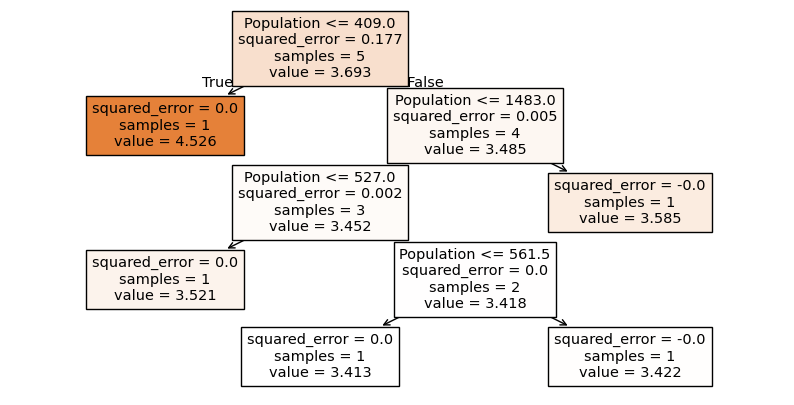

In [10]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 5))
plot_tree(tree, feature_names=features, filled=True);


 $MSE = \frac{1}{n}\sum_i^n{(y_{true} - y_{pred})^2}$

In [12]:
import numpy as np
def mse(true, pred):
    return np.mean(np.square(true - pred))

#Population <= **409**

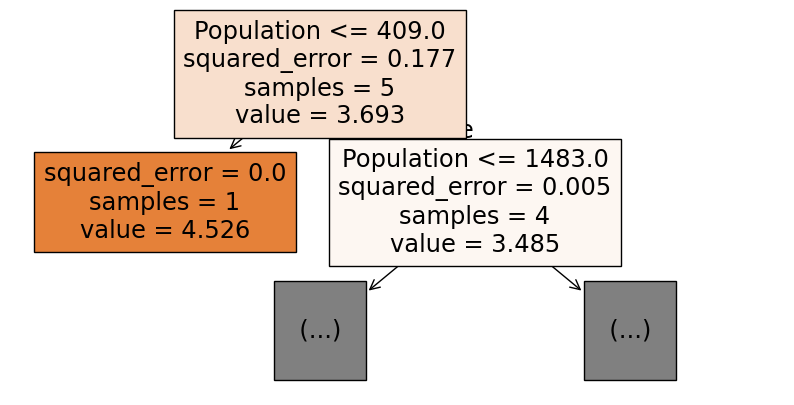

In [13]:
plt.figure(figsize=(10, 5))
plot_tree(tree, feature_names=features, filled = True, max_depth=1);

In [17]:
df_left = df[df.Population <= 409]
df_left

,HouseAge,Population,target
0,41.0,322.0,4.526


In [18]:
df_right = df[~(df.Population <= 409)]
df_right

,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


We consider that the prediction of the house price at this node is the average of all the target variables of the objects that are in the node.

$$pred = \frac{4.526 + 3.585 + 3.521 + 3.413 + 3.422}{5} = 3.6934$$


$$MSE = \frac{(4.526 - 3.6934)^2 + (3.585- 3.6934)^2 + (3.521-3.6934)^2 + (3.413-3.6934)^2 + (3.422-3.6934)^2}{5} = 0.17739$$


In [16]:
mse_root = mse(df['target'], df['target'].mean())
print(f"MSE {mse_root}")

MSE 0.17739543999999993


Now we want to understand in general how much this partitioning helps us to reduce the error, for this purpose we need to introduce the notion of “information gain”. It is calculated as

$$IG = MSE_{root} - (\frac{n_{left}}{n}MSE_{left} + \frac{n_{right}}{n}MSE_{right})$$



In [20]:
mse_left = mse(df_left['target'], df_left['target'].mean())
mse_right = mse(df_right['target'], df_right['target'].mean())

In [21]:
n_left = df_left.shape[0]
n_right = df_right.shape[0]
n = df.shape[0]

ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
ig

0.17330568999999993

In [23]:
def get_information_gain(df, feature, split):
    df_left, df_right = df[(df[feature] <= split)], df[~(df[feature] <= split)]

    n_left = df_left.shape[0]
    n_right = df_right.shape[0]
    n = df.shape[0]

    mse_root = mse(df['target'], df['target'].mean())
    mse_left = mse(df_left['target'], df_left['target'].mean())
    mse_right = mse(df_right['target'], df_right['target'].mean())

    ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
    print(f'INFORMATION GAIN {feature} <= {split} = {ig}')
    return ig

In [24]:
information_gains = {}

split_values = sorted(df.HouseAge.unique())
split_values

feature = 'HouseAge'
for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

INFORMATION GAIN HouseAge <= 21.0 = 0.0029376399999999636
INFORMATION GAIN HouseAge <= 41.0 = 0.08741093999999995


In [25]:
split_values = sorted(df.Population.unique())
split_values

[322.0, 496.0, 558.0, 565.0, 2401.0]

In [26]:
feature = 'Population'
for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

INFORMATION GAIN Population <= 322.0 = 0.17330568999999993
INFORMATION GAIN Population <= 496.0 = 0.07264400666666662
INFORMATION GAIN Population <= 558.0 = 0.024041339999999994
INFORMATION GAIN Population <= 565.0 = 0.0029376399999999636


In [27]:
max(information_gains, key=information_gains.get)

'Population <= 322.0'

$$IG_{\text{population}} = 0.1733$$
$$IG_{\text{house_age}} = 0.08743$$
$$IG_{\text{population}} > IG_{\text{house_age}}$$

and sklearn takes arithmetic mean of two values,

 just the question Population <= 409

 is obtained from values 322 and 496

 (because $\frac{322 + 496}{2} = 409$).

but the splits are the same:

In [28]:
display(df[(df['Population'] <= 409)],
        df[~(df['Population'] <= 409)])

,HouseAge,Population,target
0,41.0,322.0,4.526


,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [29]:
display(df[(df['Population'] <= 322)],
        df[~(df['Population'] <= 322)])

,HouseAge,Population,target
0,41.0,322.0,4.526


,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422
